<h1 align="center"><b><u><i>StackOverflow Search Engine & Question Recommendation</i></u></b></h1>


# 1. Business/Real-world Problem

## 1.1 Introduction
* Stack Overflow is a question and answer site for beginner as well as professional enthusiast programmers.
* It features questions and answers on a wide range of topics in programming and
now it is not limited to programming alone but answers questions on a wide range
of spectrum.
* The website serves as a platform for users to ask and answer questions, and,
through membership and active participation, to vote questions and answers up or
down and edit questions and answers. The better an answer, the higher the votes it gets, which also increase a user’s reputation.

## 1.2 Problem statement
* Given it's popularity till now more than 19.8M question have been asked on StackOverflow.
* However, this huge amount of information also makes it difficult to search for the solution one is looking for.
* It's not that big of an issue for programming veterans and other experienced professionals, because they are aware of the correct keywords required to get an appropriate answer.
* However, for a beginner programmer, this poses a great concern.


# 2. Machine Learning Problem

## 2.1 Data

### 2.1.1 Data Overview
Source: https://archive.org/download/stackexchange
<br><br>
There are lots of data available for mutiple topics. For this case study I've selected a few topics which are as follows:<br />
<pre>
1. ai.meta.stackexchange.com.7z
2. ai.stackexchange.com.7z
3. android.meta.stackexchange.com.7z
4. android.stackexchange.com.7z
5. arduino.meta.stackexchange.com.7z
6. arduino.stackexchange.com.7z
7. computergraphics.meta.stackexchange.com.7z
8. computergraphics.stackexchange.com.7z
9. cs.meta.stackexchange.com.7z
10. cs.stackexchange.com.7z
11. datascience.meta.stackexchange.com.7z
12. datascience.stackexchange.com.7z
13. iot.meta.stackexchange.com.7z
14. iot.stackexchange.com.7z
15. robotics.meta.stackexchange.com.7z
16. robotics.stackexchange.com.7z
17. softwareengineering.meta.stackexchange.com.7z
18. softwareengineering.stackexchange.com.7z
19. webapps.meta.stackexchange.com.7z
20. webapps.stackexchange.com.7z
</pre>
<br/>

* Total size of these dataset is 690 MB in compressed format.
* After uncompressing, it is of size 3.92 GB.
* All individual topics contains several file in XML format which are
Badges.XML, Comments.XML, PostHistory.XML, PostLinks.XML, Posts.XML,
Tags.XML, Users.XML, and Votes.XML.
* Out of these I've selected Posts.XML, as this file contains the textual
information about the post such as Title, Body, etc.
* After picking all Posts.XML the size of the used dataset is 948 MB and has
more than 650k data points.


### 2.1.2 Data Field Explanation

<pre>
<b>Id</b> - Unique identifier for each question<br />
<b>Title</b> - The question's title<br />
<b>Body</b> - The body of the question<br />
<b>Tags</b> - The tags associated with the question<br />
<b>Topic</b> - The topic or category of the question<br />
</pre>

<br />

## 2.2 Mapping the real-world problem to an ML problem

### 2.2.1 Type of Machine Learning Problem
* The problem is to build a search engine and related question recommendation based on StackOverflow questions.
* The search results should include the semantic meaning, with scalable architecture that return results in very less time.
* Natural Language Processing (NLP) the subfield of Artificial Intelligence has
proven to work very well in the past few years due to fast processors and
sophisticated model architectures and thus has immense potential for solving
various language comprehension tasks.

### 2.2.2 Performance Metric
<b>Pairwise distance:</b> 
* This method provides a safe way to take a distance matrix as input, while preserving compatibility with many other algorithms that take a vector array.
* We'll be using pairwise distance as metric to rank the semantically similar result.



### 2.2.3 Real-world/Business objectives and constraints
* Our objective is for the platform to actually understand the content of what the user is trying to search for, and then return the most similar results based on that.
* Since we are building this as a search engine in addition to the semantic relevance of the predicted posts with respect to the query post or text, there are additional constraints that needs to be satisfied.
>1. Low latency — time to return recommended result should be less,
>2. Scalability — should work even when the volume of data increases tremendously.

### 2.2.4 Source/ Useful links
a. Data source: https://archive.org/download/stackexchange<br>
b. Research paper: http://snap.stanford.edu/class/cs224w-2017/projects/cs224w-35-final.pdf<br>
c. Reference blog: https://medium.com/analytics-vidhya/building-a-simple-stack-overflow-search-engine-to-predict-posts-related-to-given-query-post-56b3e508520c<br>

## Mounting at Google Drive

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive


In [2]:
cd drive/My Drive/AAIC SC1

/content/drive/My Drive/AAIC SC1


## Importing libraries

In [3]:
import warnings
warnings.filterwarnings("ignore")
import xml.etree.ElementTree as et 
import os
import pandas as pd
import re
from collections import Counter
import numpy as np
import gensim
from tqdm import tqdm
from sklearn.metrics import pairwise_distances
import time
import random
import joblib
from sklearn.preprocessing import OneHotEncoder
from nltk.tokenize import RegexpTokenizer
from nltk.stem.porter import *
from bs4 import BeautifulSoup
from datetime import datetime
import matplotlib.pyplot as plt
from IPython.display import HTML, display, Markdown, clear_output
import seaborn as sns
from wordcloud import WordCloud
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import TfidfTransformer,CountVectorizer
from sklearn.linear_model import SGDClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from ipywidgets import widgets

In [4]:
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
stop_words = set(stopwords.words('english'))

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


# 3. Exploratory Data Analysis

## 3.1 Data Loading

## 3.1.1 Parsing XML files and converting to pandas dataframe

In [ ]:
def parse_XML(xml_file, df_cols): 
    """
    Parse the input XML file and store the result in a pandas  DataFrame with the given columns. 
    
    The first element of df_cols is supposed to be the identifier  variable, which is an attribute of each
    node element in the  XML data; other features will be parsed from the text content of each sub-element. 
    """
    #Parse XML document into element tree.
    xtree = et.parse(xml_file) #Returns ElementTree instance.
    xroot = xtree.getroot()
    rows = []
    
    for node in xroot:
        res = []
        for i in range(len(df_cols)):
            res.append(node.attrib.get(df_cols[i]))
        rows.append({df_cols[i]: res[i] for i, _ in enumerate(df_cols)})
        
    out_df = pd.DataFrame(rows, columns=df_cols)

    out_df["Id"] = range(out_df.shape[0])
    out_df["Topic"] = xml_file.split("/")[1].split('.')[0]
    out_df.set_index("Id", inplace = False) 

    return out_df

In [ ]:
allfiles = ["Data/"+i+"/Posts.xml" for i in os.listdir("Data")]
merged_df = pd.DataFrame(columns=['Id', 'Body', 'Title', 'Tags', 'Topic'])
merged_df.set_index("Id", inplace = False) 
for fileloc in allfiles:
    temp = parse_XML(fileloc, ['Id', 'Body', 'Title', 'Tags', 'Topic'])
    merged_df = pd.concat([merged_df,temp])

print(merged_df.shape)
merged_df.head()

(650561, 5)


,Id,Body,Title,Tags,Topic
0,0,"<p>What does ""backprop"" mean? Is the ""backprop...","What is ""backprop""?",<neural-networks><backpropagation><terminology...,ai
1,1,<p>Does increasing the noise in data help to i...,How does noise affect generalization?,<neural-networks><machine-learning><statistica...,ai
2,2,"<p>""Backprop"" is the same as ""backpropagation""...",None,None,ai
3,3,"<p>When you're writing your algorithm, how do ...",How to find the optimal number of neurons per ...,<deep-network><search><neurons>,ai
4,4,<p>I have a LEGO Mindstorms EV3 and I'm wonder...,How to program AI in Mindstorms,<python><mindstorms>,ai


## 3.1.2 Basic Statistics and analysis

In [ ]:
merged_df.describe()

,Body,Title,Tags,Topic
count,650561,243391,243381,650561
unique,647727,242988,135251,10
top,,2018: a year in moderation,<google-sheets>,softwareengineering
freq,2366,10,1872,229127


Observation:
* There are total of 650561 datapoints.
* Out of which 647727 datapoints are unique.
* But as we can observe, most of the title of body is not available. There are 243391 datapoint with Title with duplicate result.
* There are total 242988 datapoints with unoque title.

### 3.1.2.1 Analysis on "Title" field

In [ ]:
title_desc = merged_df['Title'].describe()
title_desc

count                         243391
unique                        242988
top       2018: a year in moderation
freq                              10
Name: Title, dtype: object

In [ ]:
print('Total number of Title: ',merged_df.shape[0])
print('\nTotal number of not null Title: ',title_desc['count'])
print('\nTotal number of unique Title: ',title_desc['unique'])
print('\nTotal number of duplicate Title: ',title_desc['count'] - title_desc['unique'])

Total number of Title:  650561

Total number of not null Title:  243391

Total number of unique Title:  242988

Total number of duplicate Title:  403


In [ ]:
#Computing total number of unique word in title column
title = merged_df['preprocessed_title'].values
total_title = ""
for i in title:
    total_title += i
lst_title = total_title.split()
vocab_title = list(set(lst_title))
print('Total number of unique word(vocab) in title column is: ',len(vocab_title))

Total number of unique word(vocab) in title column is:  63235


In [ ]:
#Computing count for each word in title
title_word_dict = dict()
for i in vocab_title:
    title_word_dict[i] = 0
for i in lst_title:
    title_word_dict[i] += 1

title_word_count_df = pd.DataFrame(title_word_dict.items(), columns=['Word', 'Count'])
title_word_count_sorted_df = title_word_count_df.sort_values(by=['Count'],ascending=True)

title_word_count_df.head()

,Word,Count
0,formalisation,1
1,subobject,3
2,picasawebalbums,1
3,nuts,6
4,blocked,136


In [ ]:
#Getting top 10 word which are very rare
print('Top 10 word which are very rare are as follows:')
title_word_count_sorted_df.head(10)

Top 10 word which are very rare are as follows:


,Word,Count
0,formalisation,1
36662,gti9060cmi,1
36663,idiosyncratic,1
36664,reinforcetype,1
36665,repsonse,1
36666,8297l100,1
36669,appsgooglecom,1
36671,bulletgazeborosorocos,1
36675,availalable,1
36660,emailtofax,1


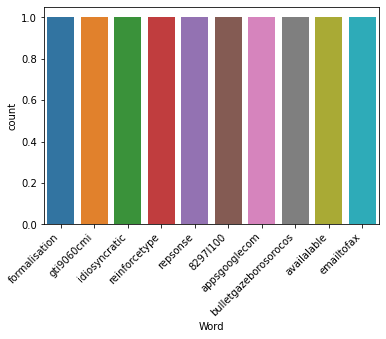

In [ ]:
#Countplot with top 10 rare word
ax = sns.countplot(x ='Word', data = title_word_count_sorted_df.head(10))
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, horizontalalignment='right')
plt.show()

In [ ]:
#Getting top 10 word which has most occured
print('Top 10 word which are very most occured are as follows:')
title_word_count_sorted_df.tail(10)

Top 10 word which are very most occured are as follows:


,Word,Count
1148,algorithm,5158
45592,code,5482
10709,app,5543
53308,phone,5652
46994,arduino,7740
16884,use,8100
50398,using,10311
21113,android,11058
43157,data,11542
1734,google,14589


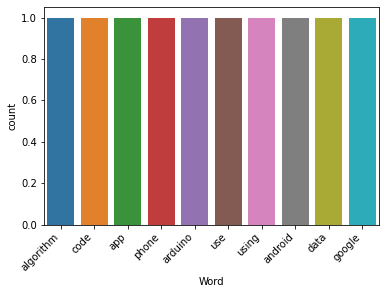

In [ ]:
#Countplot with top 10 most occured word
ax = sns.countplot(x ='Word', data = title_word_count_sorted_df.tail(10))
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, horizontalalignment='right')
plt.show()

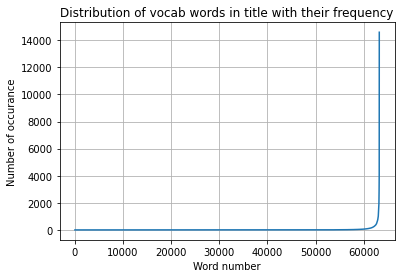

In [ ]:
plt.plot(title_word_count_sorted_df['Count'].values)
plt.title('Distribution of vocab words in title with their frequency')
plt.grid()
plt.xlabel('Word number')
plt.ylabel('Number of occurance')
plt.show()

Observation:
* Above graph shows distribution of all unique each word with its count in title data corpus.
* As we can observe, almost 60k unique words in title has occured very less whereas other 3k words has occured more.

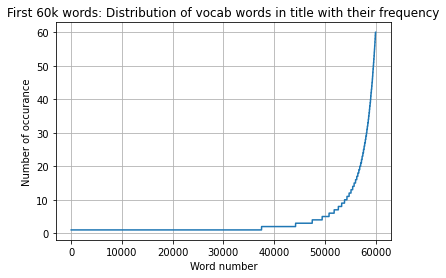

In [ ]:
plt.plot(title_word_count_sorted_df['Count'].values[:60000])
plt.title('First 60k words: Distribution of vocab words in title with their frequency')
plt.grid()
plt.xlabel('Word number')
plt.ylabel('Number of occurance')
plt.show()

Observation:
* Above graph shows distribution of first 60k word with its count in title data corpus.
* As we can observe, almost 36-37k words has occured only once.

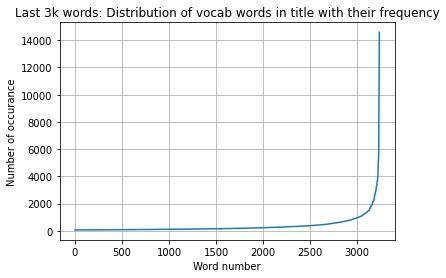

In [ ]:
plt.plot(title_word_count_sorted_df['Count'].values[60000:])
plt.title('Last 3k words: Distribution of vocab words in title with their frequency')
plt.grid()
plt.xlabel('Word number')
plt.ylabel('Number of occurance')
plt.show()

Observation:
* Above graph shows distribution of last 3k+ word with its count in title data corpus.
* As we can observe, last 200+ words has highest frequency.

In [ ]:
#Finding actual count of rare and most occured words and their percentage in total title data corpus.
rare_count,most_count = 0,0
for i in range(title_word_count_sorted_df.shape[0]):
    if title_word_count_sorted_df['Count'].values[i] < 3:
        rare_count += 1
    if title_word_count_sorted_df['Count'].values[i] > 100:
        most_count += 1

print('Total number of rare words(occured less than 3 times) are:',rare_count)
print(str((rare_count * 100)/title_word_count_sorted_df.shape[0])[:5],'% of words in total title data is rare.')

print('\nTotal number of most occured words(occured more than 100 times) are:',most_count)
print(str((most_count * 100)/title_word_count_sorted_df.shape[0])[:5],'% of words in total title data has most occured.')

Total number of rare words(occured less than 3 times) are: 44221
69.93 % of words in total title data is rare.

Total number of most occured words(occured more than 100 times) are: 2318
3.665 % of words in total title data has most occured.


### 3.1.2.2 Analysis on "Tags" field

#### Getting all individual tag in a list

In [ ]:
#all tags in a list
tags = list(merged_df['Tags'].values)

In [ ]:
#getting all individual tag in a list
all_tags = tags[0]
for i in range(len(tags) - 1):
    all_tags += tags[i+1]

In [ ]:
all_tags = pd.DataFrame([i + '>'for i in all_tags.split('>')[:-2]])
'''

Changed from <deep-network><search><neurons>
to <deep-network>
   <search>
   <neurons>

'''

In [ ]:
all_tags.head()

,0
0,<neural-networks>
1,<backpropagation>
2,<terminology>
3,<definitions>
4,<neural-networks>


In [ ]:
tag_desc = all_tags.describe()
tag_desc

,0
count,613380
unique,6080
top,<algorithms>
freq,10865


In [ ]:
print('Total number of Tags: ',tag_desc[0]['count'])
print('\nTotal number of unique Tags: ',tag_desc[0]['unique'])
print('\nTag {0} has highest frequency of {1}.'.format(tag_desc[0]['top'],tag_desc[0]['freq']))

Total number of Tags:  613380

Total number of unique Tags:  6080

Tag <algorithms> has highest frequency of 10865.


#### Getting count of all individual tags

In [ ]:
tag_dict = dict()
for i in set(all_tags[0].values):
    tag_dict[i] = 0
for i in all_tags[0].values:
    tag_dict[i] += 1

tag_count_df = pd.DataFrame(tag_dict.items(), columns=['Tag', 'Count'])
tag_count_df.head()

,Tag,Count
0,<battery-saver>,4
1,<self-hosted>,7
2,<schema>,76
3,<multiplexer>,57
4,<application-design>,128


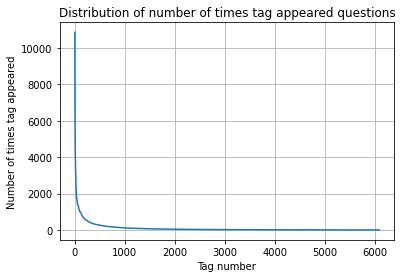

In [ ]:
plt.plot(sorted(tag_count_df['Count'].values,reverse=True))
plt.title("Distribution of number of times tag appeared questions")
plt.grid()
plt.xlabel("Tag number")
plt.ylabel("Number of times tag appeared")
plt.show()

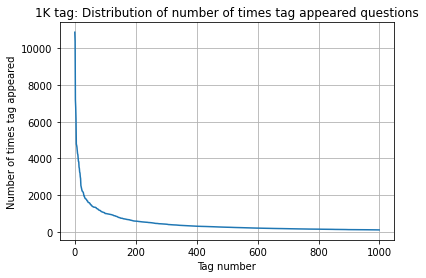

In [ ]:
plt.plot(sorted(tag_count_df['Count'].values,reverse=True)[:1000])
plt.title("1K tag: Distribution of number of times tag appeared questions")
plt.grid()
plt.xlabel("Tag number")
plt.ylabel("Number of times tag appeared")
plt.show()

Observation:
* More than 200 tags are used more than 1000 time.
* Out of which 20 to 25 tags are used more than 4000 times.

#### Most Frequent Tags

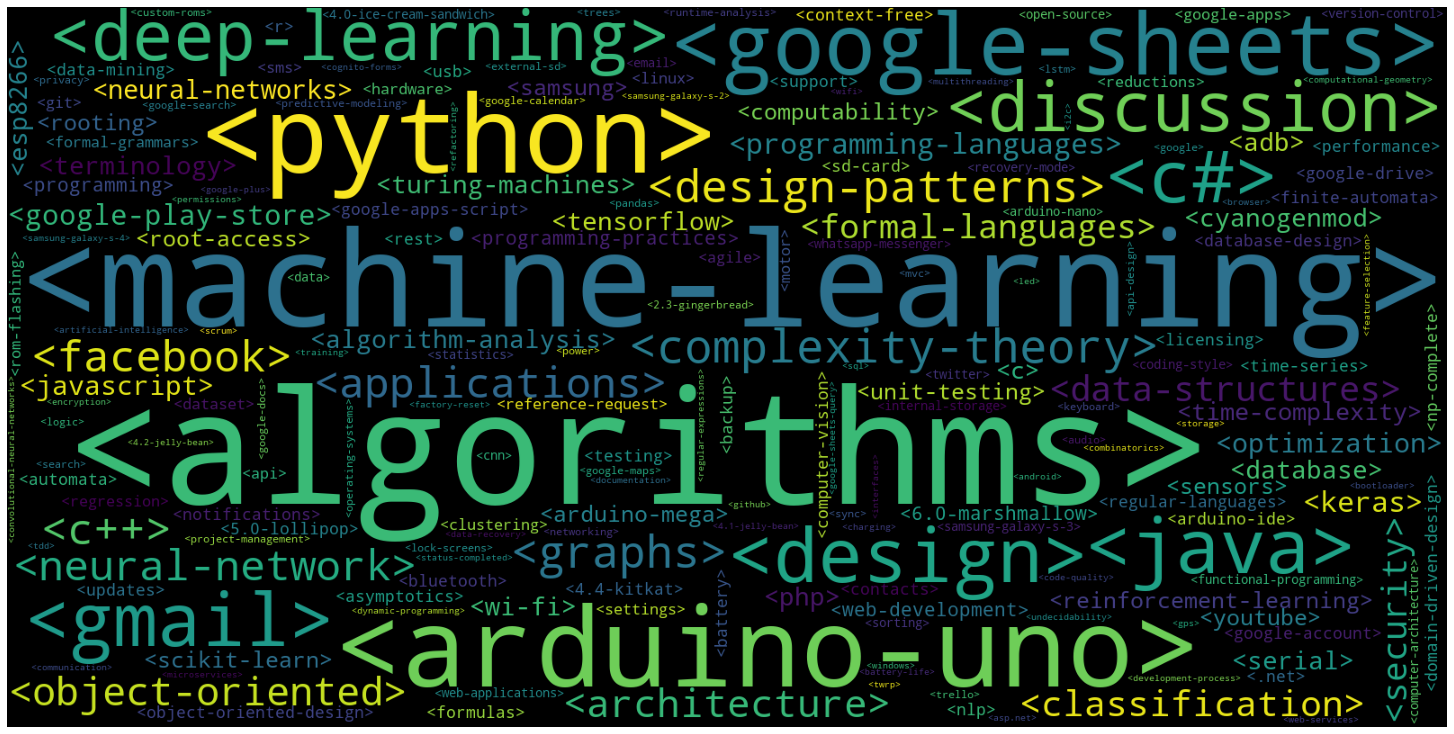

In [ ]:
# Ploting word cloud

tup = dict(tag_dict.items())
#Initializing WordCloud using frequencies of tags.
wordcloud = WordCloud(    background_color='black',
                          width=1600,
                          height=800,
                    ).generate_from_frequencies(tup)

fig = plt.figure(figsize=(20,20))
plt.imshow(wordcloud)
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()

### 3.1.2.3 Analysis on "Topic" field

In [ ]:
topic_desc = merged_df['Topic'].describe()
topic_desc

count                  650561
unique                     10
top       softwareengineering
freq                   229127
Name: Topic, dtype: object

In [ ]:
print('Total number of unique Topics: ',topic_desc['unique'])
print('\nUnique topics are: ',merged_df['Topic'].unique())
print('\nTopic {0} has the highest frequency of {1}.'.format(topic_desc['top'],topic_desc['freq']))

Total number of unique Topics:  10

Unique topics are:  ['ai' 'arduino' 'computergraphics' 'cs' 'android' 'robotics' 'webapps'
 'datascience' 'iot' 'softwareengineering']

Topic softwareengineering has the highest frequency of 59026.


#### Distribution of datapoints by topics

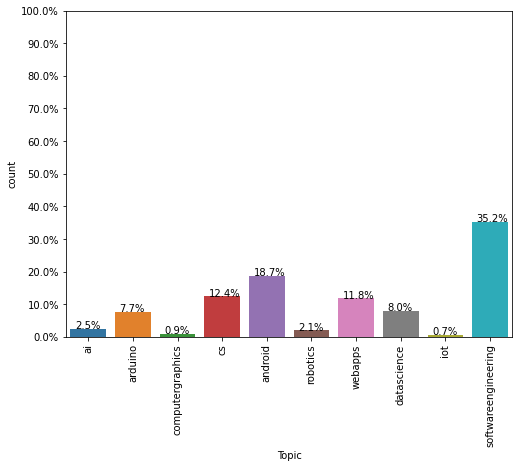

In [ ]:
plt.figure(figsize=(8,6))

total = len(merged_df['Topic'].values) + 1
ax = sns.countplot(x="Topic", data=merged_df)

for p in ax.patches:
    ax.annotate('{:.1f}%'.format(100*p.get_height()/total), (p.get_x()+0.1, p.get_height()+5))

#put 11 ticks (therefore 10 steps), from 0 to the total number of rows in the dataframe
ax.yaxis.set_ticks(np.linspace(0, total, 11))

#adjust the ticklabel to the desired format, without changing the position of the ticks. 
ax.set_yticklabels(map('{:.1f}%'.format, 100*ax.yaxis.get_majorticklocs()/total))

ax.set_xticklabels(ax.get_xticklabels(), rotation=90)

plt.show()


Observation:
* The above graph shows the topic wise distribution of question.
* As we can observe, 35.2% of questions are from softwareengineering topic which is the maximum.
* Where as topic IoT has least number of question which is of 0.7%.

### 3.1.2.4 Analysis on "Body" field

In [ ]:
#Computing total number of unique word in body column
text = merged_df['preprocessed_text'].values
total_text = ""
for i in text:
    total_text += i
lst_text = total_text.split()
vocab_text = list(set(lst_text))
print('Total number of unique word(vocab) in question body column is: ',len(vocab_text))

Total number of unique word(vocab) in question body column is:  890043


In [ ]:
#Computing count for each word in text
text_word_dict = dict()
for i in vocab_text:
    text_word_dict[i] = 0
for i in lst_text:
    text_word_dict[i] += 1

text_word_count_df = pd.DataFrame(text_word_dict.items(), columns=['Word', 'Count'])
text_word_count_sorted_df = text_word_count_df.sort_values(by=['Count'],ascending=True)

text_word_count_df.head()

,Word,Count
0,pathtofilen,1
1,muchor,1
2,accxscaled,1
3,selfassessment,3
4,weights4init,1


In [ ]:
#Getting top 10 word which are very rare
print('Top 10 word which are very rare are as follows:')
text_word_count_sorted_df.head(10)

Top 10 word which are very rare are as follows:


,Word,Count
0,pathtofilen,1
18,bs8192dd,1
16,youdsk,1
15,distingiush,1
22,lesort,1
9,d4c3,1
8,usercontacttimefrom,1
10,chessboardgetcurrentx,1
6,dummyvoid,1
5,0settitlec,1


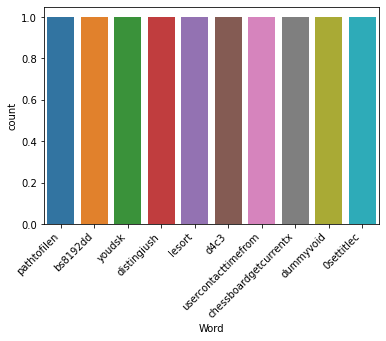

In [ ]:
#Countplot with top 10 rare word
ax = sns.countplot(x ='Word', data = text_word_count_sorted_df.head(10))
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, horizontalalignment='right')
plt.show()

In [ ]:
#Getting top 10 word which has most occured
print('Top 10 word which are very most occured are as follows:')
text_word_count_sorted_df.tail(10)

Top 10 word which are very most occured are as follows:


,Word,Count
870403,want,67176
374004,code,75810
234598,0,86038
70706,use,88423
489657,using,90239
417968,1,93665
254251,one,95167
205225,data,96217
17373,like,104331
713045,would,135516


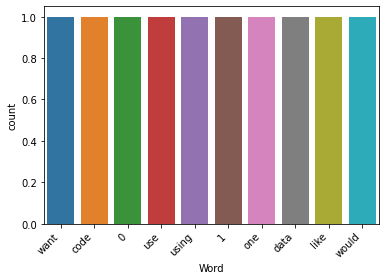

In [ ]:
#Countplot with top 10 most occured word
ax = sns.countplot(x ='Word', data = text_word_count_sorted_df.tail(10))
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, horizontalalignment='right')
plt.show()

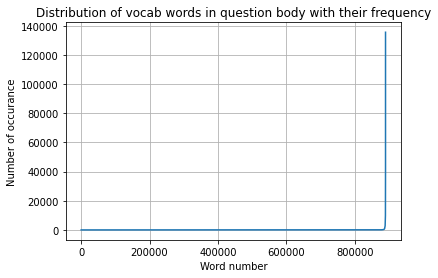

In [ ]:
plt.plot(text_word_count_sorted_df['Count'].values)
plt.title('Distribution of vocab words in question body with their frequency')
plt.grid()
plt.xlabel('Word number')
plt.ylabel('Number of occurance')
plt.show()

Observation:
* Above graph shows distribution of all unique each word with its count in question body data corpus.
* As we can observe, almost 850k+ unique words in title has occured very rarely.

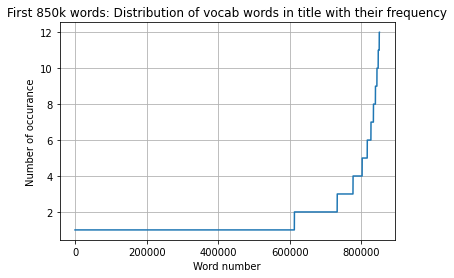

In [ ]:
plt.plot(text_word_count_sorted_df['Count'].values[:850000])
plt.title('First 850k words: Distribution of vocab words in title with their frequency')
plt.grid()
plt.xlabel('Word number')
plt.ylabel('Number of occurance')
plt.show()

Observation:
* Above graph shows distribution of first 850k word with its count in question body data corpus.
* As we can observe, almost more than 600k words has occured only once.

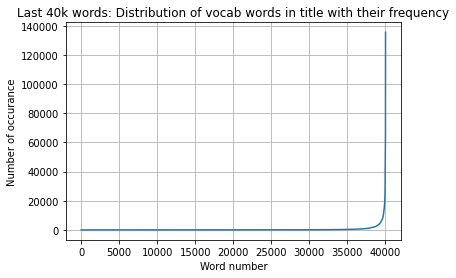

In [ ]:
plt.plot(text_word_count_sorted_df['Count'].values[850000:])
plt.title('Last 40k words: Distribution of vocab words in title with their frequency')
plt.grid()
plt.xlabel('Word number')
plt.ylabel('Number of occurance')
plt.show()

Observation:
* Above graph shows distribution of last 40k+ word with its count in question body data corpus.
* As we can observe, last 5k+ words has highest frequency.

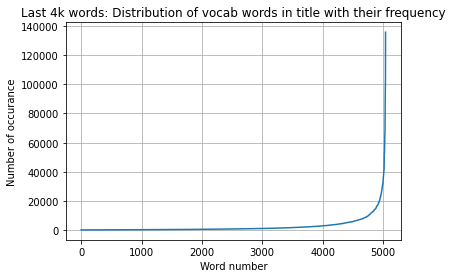

In [ ]:
plt.plot(text_word_count_sorted_df['Count'].values[885000:])
plt.title('Last 4k words: Distribution of vocab words in title with their frequency')
plt.grid()
plt.xlabel('Word number')
plt.ylabel('Number of occurance')
plt.show()

Observation:
* Above graph shows distribution of last 4k+ word with its count in question body data corpus.
* As we can observe, last 500+ words has occured more than 10k times.

In [ ]:
#Finding actual count of rare and most occured words and their percentage in total question body data corpus.
rare_count,most_count = 0,0
for i in range(text_word_count_sorted_df.shape[0]):
    if text_word_count_sorted_df['Count'].values[i] < 3:
        rare_count += 1
    if text_word_count_sorted_df['Count'].values[i] > 100:
        most_count += 1

print('Total number of rare words(occured less than 3 times) are:',rare_count)
print(str((rare_count * 100)/text_word_count_sorted_df.shape[0])[:5],'% of words in total question body data is rare.')

print('\nTotal number of most occured words(occured more than 100 times) are:',most_count)
print(str((most_count * 100)/text_word_count_sorted_df.shape[0])[:5],'% of words in total question body data has most occured.')

Total number of rare words(occured less than 3 times) are: 732064
82.25 % of words in total question body data is rare.

Total number of most occured words(occured more than 100 times) are: 10401
1.168 % of words in total question body data has most occured.


## 3.2 Data De-duplication and Cleaning

### 3.2.1 Removing datapints with null and duplicate title

In [ ]:
df_cols = ['Body', 'Title', 'Tags', 'Topic']
lower_title = []

for i in df_cols:
    merged_df = merged_df[~merged_df[i].isna()]
    merged_df = merged_df[~merged_df[i].isnull()]
merged_df = merged_df.drop_duplicates(subset="Title")

merged_df.shape

(242987, 5)

### 3.2.2 Data Preprocessing for feature Title and Body

In [ ]:
#Getting all values in a list
text = list(merged_df['Body'].values)
title = list(merged_df['Title'].values)

#### Few useful functions for data cleaning

In [5]:
#Ref: https://github.com/gayathriabhi/StackOverflow-Search-Engine/blob/master/Search_engine.ipynb

def remove_html(sentence):
    '''
    This function is to clean the word of any html-tags and make it lower Cases
    It accepts sentence or word as parameter and returns lower and removed html tag sentence or word
    '''
    cleanr = re.compile('<.*?>')
    cleantext = re.sub(cleanr, ' ', sentence)
    return cleantext.lower()

def remove_url(sentence):
    '''
    This function is to remove url from the text
    '''
    url_regex = 'http[s]?://(?:[a-zA-Z]|[0-9]|[$-_@.&+]|[!*\(\),]|(?:%[0-9a-fA-F][0-9a-fA-F]))+';
    return re.sub(url_regex, '', sentence);

def remove_punctuation(sentence):
    '''
    This function is to clean the word of any punctuation or special characters
    '''
    cleaned = re.sub(r'[?|!|"|#|:|=|+|_|{|}|[|]|-|$|%|^|&|]',r' ',sentence)
    cleaned = re.sub(r'[.|,|)|(|\|/|-|~|`|>|<|*|$|@|;|→]',r' ',cleaned)
    return cleaned

def decontraction(sentence):
    '''
    This is to decontraction of a text
    e.g. won't to will not
    '''
    # specific phrases
    sentence = re.sub(r"won't", "will not", sentence)
    sentence = re.sub(r"can\'t", "can not", sentence)
    # general phrases
    sentence = re.sub(r"n\'t", " not", sentence)
    sentence = re.sub(r"\'re", " are", sentence)
    sentence = re.sub(r"\'s", " is", sentence)
    sentence = re.sub(r"\'d", " would", sentence)
    sentence = re.sub(r"\'ll", " will", sentence)
    sentence = re.sub(r"\'t", " not", sentence)
    sentence = re.sub(r"\'ve", " have", sentence)
    sentence = re.sub(r"\'m", " am", sentence)
    sentence = re.sub(r"\n", " ", sentence)
    sentence = re.sub(r"\t", " ", sentence)
    return sentence

def remove_stopwords(total_text):
    '''
    This function is to remove the english stopwords from text data
    '''
    if type(total_text) is not int:
        string = ""
        for words in total_text.split():
            word = ("".join(e for e in words if e.isalnum()))
            # stop-word removal
            if not word in stop_words:
                string += word + " "
        return string

In [ ]:
#Calling above functions to clean Title and Body feature

preprocessed_text, preprocessed_title = [], []

for i in text:
    preprocessed_text.append(remove_stopwords(decontraction(remove_punctuation(remove_url(remove_html(i))))))

for i in title:
    preprocessed_title.append(remove_stopwords(decontraction(remove_punctuation(remove_url(remove_html(i))))))

### 3.2.3 Data Preprocessing for feature Tags

In [ ]:
#Removing angular braces from tags and separting them by space and replacing '-' with '_'

preprocessed_tags = []
for tag in tags:
    #Removing angulay braces and separating them by space
    c = re.sub(r'><',r' ',tag) 
    c = re.sub(r'<|>',r'',c)
    #Replacing '-' with '_'
    c = re.sub(r'-',r'_',c)
    preprocessed_tags.append(c)

### 3.2.4 Merging all Preprocessed data with dataframe 

In [ ]:
merged_df['preprocessed_title'] = preprocessed_title
merged_df['preprocessed_text'] = preprocessed_text
merged_df['preprocessed_tags'] = preprocessed_tags

#Setting Id column as an index with inplace True
merged_df['Id'] = range(merged_df.shape[0])
merged_df.set_index("Id", inplace = True) 

print(merged_df.shape)
merged_df.head()

(242987, 7)


,Body,Title,Tags,Topic,preprocessed_title,preprocessed_text,preprocessed_tags
Id,,,,,,,
0,"<p>What does ""backprop"" mean? Is the ""backprop...","What is ""backprop""?",<neural-networks><backpropagation><terminology...,ai,backprop,backprop mean backprop term basically backprop...,neural_networks backpropagation terminology de...
1,<p>Does increasing the noise in data help to i...,How does noise affect generalization?,<neural-networks><machine-learning><statistica...,ai,noise affect generalization,increasing noise data help improve learning ab...,neural_networks machine_learning statistical_a...
2,"<p>When you're writing your algorithm, how do ...",How to find the optimal number of neurons per ...,<deep-network><search><neurons>,ai,find optimal number neurons per layer,writing algorithm know many neurons need per s...,deep_network search neurons
3,<p>I have a LEGO Mindstorms EV3 and I'm wonder...,How to program AI in Mindstorms,<python><mindstorms>,ai,program ai mindstorms,lego mindstorms ev3 wondering way could start ...,python mindstorms
4,<p>Given the following definition of an intell...,Are humans intelligent according to the defini...,<philosophy><definitions><intelligent-agent>,ai,humans intelligent according definition intell...,given following definition intelligent agent t...,philosophy definitions intelligent_agent


### 3.2.5 Saving final merged preprocessed dataframe 

In [ ]:
#Saving final merged preprocessed dataframe
joblib.dump(merged_df,'save/merged_df.pkl')

['save/merged_df.pkl']

In [6]:
#Loading previously saved final merged preprocessed dataframe
merged_df = joblib.load('save/merged_df.pkl')

# 4. Feature Engineering

## 4.1 Description

* Feature Engineering is one of the most important and crucial step of solving any data science or machine learning problem.
* A good Feature engineering done could help to improve the performance of machine learning algorithms.
* Here, I have come up with these new features:
> Document embedding of Textual feature "Title", "Text" and "Tag".



* For vectorization of the text data, I've used following embeddings:<br/>
a. TF-IDF(Term Frequency - Inverse Document Frequency)<br/>
b. TF-IDF weighted W2V using pre-defined glove vectors<br/>
c. Word2Vec from scratch<br/>
d. Distilbert embedding<br/>
e. Universal sentence encoder<br/>

## 4.2 Feature Engineering for textual feature

### 4.2.1 TF-IDF(Term Frequency - Inverse Document Frequency)

* TF-IDF transforms text to feature vectors that can be used as input to estimator.
* It's vocabulary is a dictionary that converts each token (word) to feature index in the matrix, each unique token gets a feature index.
* In each vector the numbers (weights) represent features tf-idf score.


In [7]:
from sklearn.feature_extraction.text import TfidfVectorizer
title_tfidf_vectorizer = TfidfVectorizer()
title_tfidf_vectorizer.fit(merged_df['preprocessed_title'].values)

TfidfVectorizer(analyzer='word', binary=False, decode_error='strict',
                dtype=<class 'numpy.float64'>, encoding='utf-8',
                input='content', lowercase=True, max_df=1.0, max_features=None,
                min_df=1, ngram_range=(1, 1), norm='l2', preprocessor=None,
                smooth_idf=True, stop_words=None, strip_accents=None,
                sublinear_tf=False, token_pattern='(?u)\\b\\w\\w+\\b',
                tokenizer=None, use_idf=True, vocabulary=None)

In [ ]:
title_tfidf_vectorizer = TfidfVectorizer()
title_tfidf = title_tfidf_vectorizer.fit_transform(merged_df['preprocessed_title'].values) #For title feature
title_tfidf.get_shape()

(242987, 63176)

In [ ]:
text_tfidf_vectorizer = TfidfVectorizer()
text_tfidf = text_tfidf_vectorizer.fit_transform(merged_df['preprocessed_text'].values) #For text feature
text_tfidf.get_shape()

(242987, 889811)

In [ ]:
tag_tfidf_vectorizer = TfidfVectorizer()
tag_tfidf = tag_tfidf_vectorizer.fit_transform(merged_df['preprocessed_tags'].values) #For tag feature
tag_tfidf.get_shape()

(242987, 6073)

### 4.2.2 TF-IDF W2V using pre-defined glove_vectors

In [8]:
import pickle
with open('glove_vectors', 'rb') as f:
    #Loading pre-defined glove vectors
    glove_vectors_model = pickle.load(f)
    glove_words =  set(glove_vectors_model.keys()) #all unique keys

In [9]:
def funct_tfidf_w2v(sentence):
    '''
    This function is to compute TF-IDF weighted W2V of sentences
    '''
    #Computing average word2vec
    tfidf_w2v_vectors = []; # the avg-w2v for each sentence/review is stored in this list
    for sentence in sentence: # for each review/sentence
        vector = np.zeros(300) # as word vectors are of zero length
        tf_idf_weight = 0; # num of words with a valid vector in the sentence/review
        for word in sentence.split(): # for each word in a review/sentence
            if (word in glove_words) and (word in tfidf_words):
                vec = glove_vectors_model[word] #Getting the vector for each word
                #Here we are multiplying idf value(dictionary[word]) and the tf value((sentence.count(word)/len(sentence.split())))
                tf_idf = dictionary[word]*(sentence.count(word)/len(sentence.split())) #Getting the tfidf value for each word
                vector += (vec * tf_idf) #Calculating tfidf weighted w2v
                tf_idf_weight += tf_idf
        if tf_idf_weight != 0:
            vector /= tf_idf_weight
        tfidf_w2v_vectors.append(vector)
    return np.array(tfidf_w2v_vectors)

In [10]:
#For title feature
dictionary = dict(zip(title_tfidf_vectorizer.get_feature_names(), list(title_tfidf_vectorizer.idf_)))
tfidf_words = set(title_tfidf_vectorizer.get_feature_names())

In [ ]:
title_tfidf_w2v = funct_tfidf_w2v(merged_df['preprocessed_title'].values)
title_tfidf_w2v.shape

100%|██████████| 242987/242987 [00:10<00:00, 23607.33it/s]


(242987, 300)

In [ ]:
#For text feature
dictionary = dict(zip(text_tfidf_vectorizer.get_feature_names(), list(text_tfidf_vectorizer.idf_)))
tfidf_words = set(text_tfidf_vectorizer.get_feature_names())

In [ ]:
text_tfidf_w2v = funct_tfidf_w2v(merged_df['preprocessed_text'].values)
text_tfidf_w2v.shape

100%|██████████| 242987/242987 [03:05<00:00, 1306.73it/s]


(242987, 300)

In [ ]:
#For tag feature
dictionary = dict(zip(tag_tfidf_vectorizer.get_feature_names(), list(tag_tfidf_vectorizer.idf_)))
tfidf_words = set(tag_tfidf_vectorizer.get_feature_names())

In [ ]:
tag_tfidf_w2v = funct_tfidf_w2v(merged_df['preprocessed_tags'].values)
tag_tfidf_w2v.shape

100%|██████████| 242987/242987 [00:02<00:00, 114598.92it/s]


(242987, 300)

### 4.2.3 Word2Vec embedding from scratch

* Bag of Words, Bi-gram and TF-IDF are very common approaches for vectorizing.
* StackOverflow is very technical and they use a very specific vocabulary of words.
* However, pre-trained WordEmbedding like glove_vectors has lots of good words but they are trained on plain English text and would not be able to understand the relation between the words in vocabulary.
* Hence, it is not a good idea to use pre-trained WordEmbedding (although google has a lot of good ones).
* Thus, I've decided to train a WordEmbeddings model from scratch.

In [ ]:
doc_title = [text.split() for text in np.array(merged_df.preprocessed_title)]
doc_text = [text.split() for text in np.array(merged_df.preprocessed_text)]
doc_tag = [text.split() for text in np.array(merged_df.preprocessed_tags)]

#Gensim Word2Vec is to define our own W2V model with our own corpus words
#size (int, optional) – Dimensionality of the word vectors.
#window (int, optional) – Maximum distance between the current and predicted word within a sentence.
#min_count (int, optional) – Ignores all words with total frequency lower than this.
#workers (int, optional) – Use these many worker threads to train the model (faster training with multicore machines).

#Word2Vec for title feature
title_w2v_model = gensim.models.word2vec.Word2Vec(size=300, window=7,  min_count=10, workers=8)
title_w2v_model.build_vocab(doc_title)

#Word2Vec for text feature
text_w2v_model = gensim.models.word2vec.Word2Vec(size=300, window=7,  min_count=10, workers=8)
text_w2v_model.build_vocab(doc_text)

#Word2Vec for tag feature
tag_w2v_model = gensim.models.word2vec.Word2Vec(size=300, window=7,  min_count=10, workers=8)
tag_w2v_model.build_vocab(doc_tag)

In [ ]:
# Training Word Embeddings for title
title_w2v_model.train(doc_title, total_examples=len(doc_title), epochs=32)
title_w2v_model.save('w2v_model/title_word2vec_embeddings.bin')

In [ ]:
# Training Word Embeddings for text
text_w2v_model.train(doc_text, total_examples=len(doc_text), epochs=32)
text_w2v_model.save('w2v_model/text_word2vec_embeddings.bin')

In [ ]:
# Training Word Embeddings for tag
tag_w2v_model.train(doc_tag, total_examples=len(doc_tag), epochs=32)
tag_w2v_model.save('w2v_model/tag_word2vec_embeddings.bin')

In [11]:
#Loading W2V embedding
title_w2v_model = gensim.models.word2vec.Word2Vec.load('w2v_model/title_word2vec_embeddings.bin')
#text_w2v_model = gensim.models.word2vec.Word2Vec.load('w2v_model/text_word2vec_embeddings.bin')
#tag_w2v_model = gensim.models.word2vec.Word2Vec.load('w2v_model/tag_word2vec_embeddings.bin')

In [12]:
def word_to_vector(text, embeddings, dim=300):
    '''
    This function accept text and w2v embedding object as input parameter with by default dimension of 300
    #And returns embedded text of 300 dimension
    '''
    text_embedding = np.zeros(dim)
    valid_words = 0
    for word in text.split(' '): #Splitting text by space
        if word in embeddings: #If word is there in custom defined w2v keys
            valid_words += 1 
            text_embedding += embeddings[word]
    if valid_words > 0: 
        return text_embedding/valid_words
    else:
        return text_embedding

In [ ]:
#For title feature
title_w2v = []
for text in tqdm(merged_df.preprocessed_title):
    title_w2v.append(word_to_vector(text, title_w2v_model))
title_w2v = np.array(title_w2v)
title_w2v.shape

100%|██████████| 242987/242987 [00:35<00:00, 6759.55it/s]
(242987, 300)


In [ ]:
#For text feature
text_w2v = []
for text in tqdm(merged_df.preprocessed_text):
    text_w2v.append(word_to_vector(text, text_w2v_model))
text_w2v = np.array(text_w2v)
text_w2v.shape

100%|██████████| 242987/242987 [06:12<00:00, 652.64it/s]


(242987, 300)

In [ ]:
#For tag feature
tag_w2v = []
for text in tqdm(merged_df.preprocessed_tags):
    tag_w2v.append(word_to_vector(text, tag_w2v_model))
tag_w2v = np.array(tag_w2v)
tag_w2v.shape

100%|██████████| 242987/242987 [00:18<00:00, 13301.40it/s]


(242987, 300)

### 4.2.4 Distilbert embedding

* DistilBERT is a small, fast, cheap and light Transformer model trained by distilling Bert base. It has 40% less parameters than bert-base-uncased , runs 60% faster while preserving over 95% of Bert's performances.
* Since we are building search engine, low latency is the important constraints that need to be considered.
* Hence, I'm implementening distilBERT which preserves almost more than 95% of BERT performance by reducing the half of the parameters.

In [16]:
#!pip install sentence_transformers
from sentence_transformers import SentenceTransformer

def distilbert_embedding(sentences):
    '''
    This function fine-tunes BERT with a siamese or triplet network structure to produce
    semantically meaningful sentence embeddings that can be used in unsupervised scenarios:
    Semantic textual similarity via cosine-similarity, pairwise-distance, clustering, semantic search.
 
    It accept sentence as a parameter and returns embeded vector with 768 columns.
    '''
    #Loading the distilBERT model. Various models trained on Natural Language Inference (NLI)
    #https://github.com/UKPLab/sentence-transformers/blob/master/docs/pretrained-models/nli-models.md

    model = SentenceTransformer('distilbert-base-nli-mean-tokens/')
    
    #Each sentence is encoded as a 1-D vector with 768 columns
    sentence_embeddings = model.encode(sentences)
    
    return np.array(sentence_embeddings)

asshole


In [ ]:
#For title feature
title_distilbert = distilbert_embedding(merged_df['preprocessed_title'].values) #For title feature
title_distilbert.shape

100%|██████████| 245M/245M [00:13<00:00, 18.0MB/s]


(242987, 768)

In [ ]:
#For text feature
text_distilbert = distilbert_embedding(merged_df['preprocessed_text'].values) #For text feature
text_distilbert.shape

(242987, 768)

In [ ]:
#For tag feature
tag_distilbert = distilbert_embedding(merged_df['preprocessed_tags'].values) #For tag feature
tag_distilbert.shape

(242987, 768)

### 4.2.5 Universal sentence encoder

* DistilBERT is much faster than BERT model but even though in search engine its not good choice to use.
* Because it not only take much more time to train and convert text to vector but also doesn't keep semantic meaning of words.
* BERT kind of model are good practice to use for linguistic transformation because it allows to learn word context based on surrounding words rather than just the word that immediately precedes or follows it not on the basis of semantic similarity.
* The Universal Sentence Encoder makes getting sentence level embeddings as easy as it has historically been to lookup the embeddings for individual words.
* The sentence embeddings can then be trivially used to compute sentence level meaning similarity as well as to enable better performance on downstream classification tasks using less supervised training data.

In [ ]:
#Ref: https://www.tensorflow.org/hub/tutorials/semantic_similarity_with_tf_hub_universal_encoder
#Loading universal sentence encoder and defining a function to convert sentence to embedded vectors

import tensorflow_hub as hub
universal_sentence_encoder_model = hub.load("https://tfhub.dev/google/universal-sentence-encoder/4")

def universal_sentence_encoding(sentence):
    '''
    This function accepts the sentences and returns 512 dimension
    embedded vector using universal sentence encoding.
    '''
    return np.array(universal_sentence_encoder_model(sentence))

In [ ]:
#For title feature
title_universal_sentence_encoder = universal_sentence_encoding(merged_df['preprocessed_title'].values) #For title feature
title_universal_sentence_encoder.shape

(242987, 512)

In [ ]:
#For text feature

#While directly embedding the whole text corpus, session gets crashed due to RAM issue.
#Hence, embedding the text corpus by senfding set of 1000 datapoints each.
#Then storing those 1000 embedded vectors and embedding remaining corpus with each set of 1000 datapoints again.

text_universal_sentence_encoder = []
start, end = 0, 1000
for i in tqdm(range(int(np.ceil(merged_df.shape[0]/1000)))):
    text_universal_sentence_encoder.extend(universal_sentence_encoding(merged_df['preprocessed_text'].values[start:end])) #For text feature
    if i == int(np.ceil(merged_df.shape[0]/1000)) - 2:
        start = end
        end += 987
    else:
        start = end
        end += 1000

100%|██████████| 243/243 [03:26<00:00,  1.18it/s]


In [ ]:
text_universal_sentence_encoder = np.array(text_universal_sentence_encoder)
text_universal_sentence_encoder.shape

(242987, 512)

In [ ]:
#For tag feature
tag_universal_sentence_encoder = universal_sentence_encoding(merged_df['preprocessed_tags'].values) #For tag feature
tag_universal_sentence_encoder.shape

(242987, 512)

## 4.3 Saving all embedded vectors

In [ ]:
#Saving all feature embedded variables
joblib.dump((title_tfidf,text_tfidf,tag_tfidf),open('save/tfidf.pkl','wb'))
joblib.dump((title_w2v,text_w2v,tag_w2v),open('save/w2v.pkl','wb'))
joblib.dump((title_tfidf_w2v,text_tfidf_w2v,tag_tfidf_w2v),open('save/tfidf_w2v.pkl','wb'))
joblib.dump(title_distilbert,'save/title_distilbert.pkl')
joblib.dump(text_distilbert,'save/text_distilbert.pkl')
joblib.dump(tag_distilbert,'save/tag_distilbert.pkl')
joblib.dump(title_universal_sentence_encoder,'save/title_universal_sentence_encoder.pkl')
joblib.dump(text_universal_sentence_encoder,'save/text_universal_sentence_encoder.pkl')
joblib.dump(tag_universal_sentence_encoder,'save/tag_universal_sentence_encoder.pkl')

## 4.4 Loading all embedded vectors

In [19]:
#Loading previoulsy saved tfidf and tfidf_w2v embedded vectors
title_tfidf,text_tfidf,tag_tfidf = joblib.load(open("save/tfidf.pkl", 'rb'))
title_tfidf_w2v,text_tfidf_w2v,tag_tfidf_w2v = joblib.load(open('save/tfidf_w2v.pkl','rb'))

In [20]:
#Loading previoulsy saved w2v feature vectors
title_w2v,text_w2v,tag_w2v = joblib.load(open('save/w2v.pkl','rb'))

In [53]:
#Loading previoulsy saved distilBERT feature vectors
title_distilbert = joblib.load('save/title_distilbert.pkl')
text_distilbert = joblib.load('save/text_distilbert.pkl')
tag_distilbert = joblib.load('save/tag_distilbert.pkl')

In [54]:
#Loading previoulsy saved universal_sentence_encoded embedded vectors
title_universal_sentence_encoder = joblib.load('save/title_universal_sentence_encoder.pkl')
text_universal_sentence_encoder = joblib.load('save/text_universal_sentence_encoder.pkl')
tag_universal_sentence_encoder = joblib.load('save/tag_universal_sentence_encoder.pkl')

# 5. Model for topic prediction

* While recommending a question given input query post, we can retrieve topic or categpry of input question using indices but for given raw text as input, we need to predict topic or category of searched question text.
* To do so, implementing a model which will predict the topic or category of query question text.

## 5.1 Splitting data into train and test

In [ ]:
#Splitting x and y into 2 parts(train(85%) and test(15%))
#x: title
#y: topic
x, y = merged_df['preprocessed_title'].values, merged_df['Topic'].values
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.15, stratify = y)

## 5.2 ML model

In [ ]:
def ml_model(model):
  '''
  This function accepts the name of the ML model and returns object of
  respected trained ML model.
  Possible ML model names are: NaiveBayes, LogisticRegression and SVC.
  '''

  start_time = time.time()

  if model == 'NaiveBayes':
    #Naive Bayes
    classifier = Pipeline([('vect', CountVectorizer()),
                  ('tfidf', TfidfTransformer()),
                  ('clf', MultinomialNB()),
                 ])
    classifier.fit(x_train, y_train)
    y_pred = classifier.predict(x_test)

  elif model == 'LogisticRegression':
    #Logistic Regression
    classifier = Pipeline([('vect', CountVectorizer()),
                  ('tfidf', TfidfTransformer()),
                 ('clf', LogisticRegression(n_jobs=-1, C=1e6)),
                 ])
    classifier.fit(x_train, y_train)
    y_pred = classifier.predict(x_test)

  elif model == 'SVC':
    #SVC
    classifier = Pipeline([('vect', CountVectorizer()),
                  ('tfidf', TfidfTransformer()),
                  ('clf', SGDClassifier(loss='hinge', penalty='l2', alpha=1e-5, random_state=42, max_iter=5, tol=None, n_jobs=-1)),
                 ])
    classifier.fit(x_train, y_train)
    y_pred = classifier.predict(x_test)

  print(model,'model has been trained in',np.round(time.time() - start_time,2),'seconds.')
  print('\nClassification Report:\n')
  print(classification_report(y_test, y_pred,target_names=merged_df['Topic'].unique()))

  return classifier

In [ ]:
model_names = ['NaiveBayes', 'LogisticRegression', 'SVC']
model_obj = dict()

for i in range(len(model_names)):
    print('-'*75)
    model = ml_model(model_names[i])
    model_obj[model_names[i]] = model 
    print('-'*75)

---------------------------------------------------------------------------
NaiveBayes model has been trained in 2.75 seconds.

Classification Report:

                     precision    recall  f1-score   support

                 ai       0.74      0.03      0.06      1028
            arduino       0.84      0.92      0.88      8090
   computergraphics       0.88      0.77      0.82      3138
                 cs       0.92      0.08      0.15       443
            android       0.79      0.80      0.79      5493
           robotics       0.76      0.73      0.74      3662
            webapps       0.00      0.00      0.00       265
        datascience       0.97      0.24      0.39       813
                iot       0.72      0.91      0.80      8854
softwareengineering       0.86      0.79      0.83      4663

           accuracy                           0.79     36449
          macro avg       0.75      0.53      0.55     36449
       weighted avg       0.80      0.79      0.77   

In [ ]:
#Saving topic prediction models
joblib.dump(model_obj,'save/model_obj.pkl')

['save/model_obj.pkl']

In [21]:
if os.path.exists('save/model_obj.pkl'):
    #Loading topic prediction models
    model_obj = joblib.load('save/model_obj.pkl')
    print('Topic prediction model has been loaded.')
else:
    print('No model has been found!!!\nTrain your topic prediction model again.')

Topic prediction model has been loaded.


## 5.3 Random sanity check of ML model

In [26]:
#Random sanity check of topic prediction model
model_names = ['NaiveBayes', 'LogisticRegression', 'SVC']
for index in range(3):
    print(model_names[index])
    print('-'*50)
    for i in range(5):
        n = random.randint(0,merged_df.shape[0])
        print(i+1,'] Predicted topic:',model_obj[model_names[index]].predict([merged_df.preprocessed_title[n]])[0])
        print('Actual topic:',merged_df.Topic[n],'\n')
    print('-'*50)

NaiveBayes
--------------------------------------------------
1 ] Predicted topic: android
Actual topic: android 

2 ] Predicted topic: webapps
Actual topic: webapps 

3 ] Predicted topic: android
Actual topic: android 

4 ] Predicted topic: android
Actual topic: android 

5 ] Predicted topic: webapps
Actual topic: webapps 

--------------------------------------------------
LogisticRegression
--------------------------------------------------
1 ] Predicted topic: softwareengineering
Actual topic: softwareengineering 

2 ] Predicted topic: android
Actual topic: android 

3 ] Predicted topic: softwareengineering
Actual topic: softwareengineering 

4 ] Predicted topic: softwareengineering
Actual topic: softwareengineering 

5 ] Predicted topic: cs
Actual topic: ai 

--------------------------------------------------
SVC
--------------------------------------------------
1 ] Predicted topic: datascience
Actual topic: datascience 

2 ] Predicted topic: softwareengineering
Actual topic: sof

## 5.4  Observation

* As we can observe in classification report of our topic prediction model, SVC model works very well as compared to Naive Bayes and Logistic Regression.
* Although, there is not much difference between SVC and Logistic Regression result but if we compare the time to train, SVC model trains much more faster than Logistic Regression by also giving slightly better results.
* Even if we compare our sanity check results, SVC model prediction is more accurate than other model.

# 6. Spell correction for searched text

In [45]:
#Building text corpus of titles for spell correction

if os.path.exists('save/corpus_word_dict.pkl'):
    #Loading corpus dictionary
    corpus_word_dict = joblib.load('save/corpus_word_dict.pkl')
    print('Spell corrector dictionary has been loaded.')
else:
    #Taking preprocessed title without removing stop words.
    preprocessed_title = []
    title = list(merged_df['Title'].values)
    for i in title:
        preprocessed_title.append(decontraction(remove_punctuation(remove_url(remove_html(i)))))
    corpus = ''
    for i in preprocessed_title:
        corpus += i
    corpus = re.sub("\d+", " ", corpus)
    #Getting count of each words in dictionary
    corpus_word_dict = Counter(corpus.split())
    #Saving corpus dictionary
    joblib.dump(corpus_word_dict,'save/corpus_word_dict.pkl')
    print('Spell corrector dictionary has been saved.')

Spell corrector dictionary has been loaded.


In [28]:
#Ref: https://norvig.com/spell-correct.html

#Few functions to correct the spelling of given word.

def Probability(word, N = sum(corpus_word_dict.values())): 
    """
    This function finds probability of word.
    """
    return corpus_word_dict[word] / N

def correction(word): 
    """
    This function finds most probable spelling correction for word.
    """
    return max(candidates(word), key = Probability)

def candidates(word): 
    """
    This function generates possible spelling corrections for word.
    """
    return (known_word([word]) or known_word(word_away_1(word)) or known_word(word_away_2(word)) or [word])

def known_word(words): 
    """
    The subset of words that appear in the dictionary of WORDS.
    """
    return set(w for w in words if w in corpus_word_dict)

def word_away_1(word):
    """
    This function finds words that are one char away from input word.
    """
    alphabets = 'abcdefghijklmnopqrstuvwxyz'
    splits = [(word[:i], word[i:]) for i in range(len(word) + 1)]
    deletes = [left + right[1:] for left, right in splits if right]
    transposes = [left + right[1] + right[0] + right[2:] for left, right in splits if len(right) > 1]
    replaces = [left + center + right[1:] for left, right in splits if right for center in alphabets]
    inserts = [left + center + right for left, right in splits for center in alphabets]
    return set(deletes + transposes + replaces + inserts)

def word_away_2(word): 
    """
    This function finds words that are two char away from input word.
    """
    return (e2 for e1 in word_away_1(word) for e2 in word_away_1(e1))

# 7. Few useful utility functions

In [31]:
#Few utility functions for search engine optimization and evaluation.

'''
As we are building search engines so low latency is one of the most important constraints that needs to be considered.

So to make this search engine more faster, searching the recommended question only through those questions
which belong to the same category of input searched question.

E.g. For questions belonging to ai, it is more likely to find a similar question from ai category only.

Thus, it reduces the time by avoiding searching through all questions.

The below function creates dictionary which contains all topic names as key and their respective indices list as value.
'''
#Getting indices for feature by topic to reduce the search time through all data points as related questions are more likely to be of same topic.
def filter_topic_wise_data(topic):
    '''
    This function accepts the topic name and returns all indices of datapoint for that topic.
    '''
    filter_indices = []
    for i in range(merged_df.shape[0]):
        if merged_df['Topic'].values[i] == topic:
            filter_indices.append(i)
    return filter_indices

if os.path.exists('save/topic_index_dict.pkl'):
    #Loading dictionary
    topic_index_dict = joblib.load('save/topic_index_dict.pkl')
else:
    #Getting all unique topics
    topics = merged_df['Topic'].unique()
    #Storing indices of all datapoints for each unique topic
    topic_index_dict = {}
    for topic in topics:
        topic_index_dict[topic] = filter_topic_wise_data(topic)
    #Saving dictionary
    joblib.dump(topic_index_dict,'save/topic_index_dict.pkl')


'''
As we are building search engines so low latency is one of the most important constraints that needs to be considered.

So to make this search engine more faster, searching the recommended question only through those questions
which has same tag as of input searched question.

Thus, it reduces the time by avoiding searching through all questions.

The below function creates dictionary which contains all tag names as key and their respective indices list as value.
'''
#Getting indices for feature by tags to reduce the search time through all data points as related questions are more likely to have same tag.
def filter_tag_wise_data(tag):
    '''
    This function accepts the tag of the question and returns all indices of datapoint for that tag.
    '''
    filter_indices = []
    for i in range(merged_df.shape[0]):
        if tag in merged_df['preprocessed_tags'].values[i]:
            filter_indices.append(i)
    return filter_indices

if os.path.exists('save/tag_index_dict.pkl'):
    #Loading dictionary
    tag_index_dict = joblib.load('save/tag_index_dict.pkl')
else:
    #Getting all unique tags
    all_tag_list = []
    for i in merged_df['preprocessed_tags'].values:
        all_tag_list.extend(i.split())
    all_tag_list = list(set(all_tag_list))
    #Storing indices of all datapoints with each unique tag
    tag_index_dict = {}
    for tag in all_tag_list:
        tag_index_dict[tag] = filter_tag_wise_data(tag)
    #Saving dictionary
    joblib.dump(tag_index_dict,'save/tag_index_dict.pkl')



#Utility functions for search engine.
def get_vector(vectorizer, preprocessed_user_input):
    '''
    This function accepts the vectorizer and preprocess user input and return embedded vector as per passed vectorizer
    '''
    if vectorizer == 'TF-IDF':
        return title_tfidf_vectorizer.transform([preprocessed_user_input])

    elif vectorizer == 'TF-IDF Word2Vec':
        return funct_tfidf_w2v(preprocessed_user_input)
    
    elif vectorizer == 'Word2Vec':
        return word_to_vector(preprocessed_user_input, title_w2v_model)

    elif vectorizer == 'distilBERT':
        return distilbert_embedding(preprocessed_user_input)
    
    elif vectorizer == 'Universal Sentence Encoder':
        return universal_sentence_encoding([preprocessed_user_input])



#Utility functions for evaluating search engine result.
def get_word_vector(title, vectorizer):
    '''
    This function accepts the title of question and vectorizer name and returns embedded vector of title for each word.
    '''
    vec = []
    for i in title.split():
        if vectorizer == 'TF-IDF':
            if i in title_tfidf_vectorizer.vocabulary_:
                vec.append(title_tfidf_vectorizer.vocabulary_[i])
            else:
                vec.append(np.zeros(shape=(6073,)))

        elif vectorizer == 'TF-IDF Word2Vec':
            if i in glove_words:
                vec.append(glove_vectors_model[i])
            else:
                vec.append(np.zeros(shape=(300,)))

        elif vectorizer == 'Word2Vec':
            if i in set(title_w2v_model.wv.vocab.keys()):
                vec.append(title_w2v_model[i])
            else:
                vec.append(np.zeros(shape=(300,)))

        elif vectorizer == 'distilBERT':
            for i in title.split():
                vec.append(np.zeros(shape=(768,)))

        elif vectorizer == 'Universal Sentence Encoder':
            for i in title.split():
                vec.append(np.zeros(shape=(512,)))

    return np.array(vec)

def get_distance(vec1, vec2):
    '''
    This function is to calculates distance between vectors
    '''
    final_dist = []
    for i in vec1:
        dist = []
        for j in vec2:
            dist.append(np.linalg.norm(i-j))
        final_dist.append(np.array(dist))
    return np.array(final_dist)

def heatmap(input_title, predicted_title, vectorizer):
    '''
    This function accepts the input_title, predicted_title and name of used vectorizer,
    and plots the heatmap between input and predicted title.
    '''
    s1_vec = get_word_vector(input_title, vectorizer)
    s2_vec = get_word_vector(predicted_title, vectorizer)
    s1_s2_dist = get_distance(s1_vec, s2_vec)

    plt.figure(figsize=(10,10))

    # ploting the heap map based on the pairwise distances
    ax = sns.heatmap(np.round(s1_s2_dist,6), annot=False)
    # set the x axis labels as recommended apparels title
    ax.set_xticklabels(predicted_title.split())
    # set the y axis labels as input apparels title
    ax.set_yticklabels(input_title.split())

    plt.show()

# 8. Search Engine

In [71]:
def StackOverflow_Search_Engine(vectorizer, search_option, num_results, title_weight = 20, text_weight = 10, tag_weight = 10):
  
    '''
    This function returns the relate question given user query search question.

    Input Parameters:
    vectorizer: this paramater is to specify which vectorizer to use for text embedding.
    search_option: search either using query text or question id.
    num_results: number of results to be displayed.
    title_weight: weight of the title feature by default it's value is 20.
    text_weight: weight of the text feature by default it's value is 10.
    tag_weight: weight of the tag feature by default it's value is 10.
    
    Note: By default features text and tag has same weight wheras title feature has more weight.
    '''

    preprocessed_title_output = []

    if vectorizer == "TF-IDF":
        title_features = title_tfidf
        text_features = text_tfidf
        tag_features = tag_tfidf

    elif vectorizer == "Word2Vec":
        title_features = title_w2v
        text_features = text_w2v
        tag_features = tag_w2v

    elif vectorizer == "TF-IDF Word2Vec":
        title_features = title_tfidf_w2v
        text_features = text_tfidf_w2v
        tag_features = tag_tfidf_w2v

    elif vectorizer == "distilBERT":
        title_features = title_distilbert
        text_features = text_distilbert
        tag_features = tag_distilbert

    elif vectorizer == "Universal Sentence Encoder":
        title_features = title_universal_sentence_encoder
        text_features = text_universal_sentence_encoder
        tag_features = tag_universal_sentence_encoder

    output = "<br/><center><img width='90%' style='border-style: solid;border-color: white; border-radius: 10px;' src='https://i.ibb.co/p3PdbQF/stackoverflow-my-logo.jpg'/></center><br/>"

    if search_option == 'Text':
        ip = "<h2>Enter query text to search:</h2>"
        display(HTML(ip))
        user_input = input()
        start_time = time.time()
        user_input = str(user_input)
        #Preprocessing user input text
        preprocessed_user_input = decontraction(remove_punctuation(remove_url(remove_html(user_input))))
        #Spell correction of words
        corrected_preprocessed_user_input = ''
        for i in preprocessed_user_input.split():
            corrected_preprocessed_user_input += correction(i) + ' '
        preprocessed_user_input = remove_stopwords(corrected_preprocessed_user_input)
        preprocessed_title_output.append(preprocessed_user_input)
        #Predicting the topic or categpry of user input text using SVC model.
        topic = model_obj['SVC'].predict([preprocessed_user_input])[0]
        #Getting embedded vector of preprocessed user input as per passed vectorizer
        if vectorizer == "TF-IDF Word2Vec":
            input_embed = get_vector(vectorizer, [preprocessed_user_input])
        else:
            input_embed = get_vector(vectorizer, preprocessed_user_input)
        #pairwise distance between searched question title and all other title
        pairwise_dist = pairwise_distances(title_features[topic_index_dict[topic]],input_embed.reshape(1,-1))
        # np.argsort will return indices of the smallest distances
        indices = np.argsort(pairwise_dist.flatten())[0:num_results]
        #pdists will store the smallest distances
        pdists  = np.sort(pairwise_dist.flatten())[0:num_results]
        output += '<div style="border: 4px solid silver;border-radius: 4px;background-color:green;width:90%;margin-left:5%;padding:15px;">'
        output += '<h1><u> Questions related to your search </u></h1><h5>About ' + str(num_results) + ' results (' + str(time.time() - start_time) + ' seconds)</h5></div>'
        output += '<div style="border: 4px solid silver;border-radius: 4px;width:90%;margin-left:5%;padding:15px;">'
        output += '<h2> You searched for : <u style="color: #6666ff;">' +str(user_input)+ '</u></h2>'
        output += '<h3> Showing result for : <u style="color: #6666ff;">' +str(corrected_preprocessed_user_input)+ '</u></h3></div>'
        for i in range(0,len(indices)):
            preprocessed_title_output.append(merged_df['preprocessed_title'].values[[topic_index_dict[topic]]][indices[i]])
            #If there is not even one word similarity between input text and predicted text, flag will be set to 0.
            #flag = 0 won't show irrelevant text instead shows message to try different keywords.
            if i == 0:
                flag = 0
                for j in preprocessed_title_output[i].split():
                    for k in preprocessed_title_output[i+1].split():
                        if j == k:
                            flag = 1
                            break
                    if flag == 1:
                        break
            if flag == 1: #flag with value 1 defines that there is at least one word similarity between input text and predicted text.
                output += '<div style="border: 4px solid silver;border-radius: 4px;width:90%;margin-left:5%;padding:15px;">'
                #output += '<h4 style="float:right;"> Pairwise distance : ' + str(pdists[i]) + '</h4>'
                output += '<h2>' + str(i+1)+ '] <u style="color: #6666ff;">' +str(merged_df['Title'].values[[topic_index_dict[topic]]][indices[i]])+ '</u></h2>'
                output += '<h3> Tags: ' + re.sub(r'_',r'-', re.sub(r' ',r', ', str(merged_df['preprocessed_tags'].values[[topic_index_dict[topic]]][indices[i]]))) + '</h3>'
                output += '</div>'
            elif flag == 0: #flag with value 0 defines that there is not even single word similarity between input text and predicted text.
                output = "<br/><center><img width='90%' style='border-style: solid;border-color: white; border-radius: 10px;' src='https://i.ibb.co/p3PdbQF/stackoverflow-my-logo.jpg'/></center><br/>"
                output += '<div style="border: 4px solid silver;border-radius: 4px;background-color:green;width:90%;margin-left:5%;padding:15px;">'
                output += '<h1><u> Questions related to your search </u></h1></div>'
                output += '<div style="border: 4px solid silver;border-radius: 4px;width:90%;margin-left:5%;padding:15px;">'
                output += '<h2><i style="color: #ff0000;">Your search - </i>' +str(user_input)+ '<i style="color: #ff0000;"> - did not matched any StackOverflow question.</i></h2>'
                output += '<h2><u>Suggestions:</u></h2>'
                output += '<h3>&#9900;&nbsp; Make sure that all words are spelled correctly.</h3>'
                output += '<h3>&#9900;&nbsp; Try different keywords.</h3>'
                output += '</div>'
                break

    elif search_option == 'Id':
        ip = "<h2>Enter question id to search:</h2>"
        display(HTML(ip))
        user_input = input()
        start_time = time.time()
        user_input = int(user_input)
        #Getting indices of question with these input question tags
        tag_index = []
        for i in merged_df['preprocessed_tags'].values[user_input].split():
            tag_index.extend(tag_index_dict[i])
        tag_index = list(set(tag_index))
        #pairwise distance between searched question title and all other title
        title = pairwise_distances(title_features[tag_index],title_features[user_input].reshape(1,-1))
        #pairwise distance between searched question text and all other text
        text = pairwise_distances(text_features[tag_index],text_features[user_input].reshape(1,-1))
        #pairwise distance between searched question tag and all other tag
        tag = pairwise_distances(tag_features[tag_index],tag_features[user_input].reshape(1,-1))
        #Pairwise distance between query question and all other question w.r.t. all features(title, text and tag)
        pairwise_dist = ((title * title_weight) + (text * text_weight) + (tag * tag_weight)) / float(title_weight + text_weight + tag_weight)
        # np.argsort will return indices of the smallest distances
        indices = np.argsort(pairwise_dist.flatten())[0:num_results+1]
        #pdists will store the smallest distances
        pdists  = np.sort(pairwise_dist.flatten())[0:num_results+1]
        for i in range(0,len(indices)):
            if i == 0:
                preprocessed_title_output.append(merged_df['preprocessed_title'].values[[tag_index]][indices[i]])
                output += '<div style="border: 4px solid silver;border-radius: 4px;background-color:green;width:90%;margin-left:5%;padding:15px;">'
                output += '<h1><u> Questions related to your search </u></h1><h5>About ' + str(num_results) + ' results (' + str(time.time() - start_time) + ' seconds)</h5></div>'
                output += '<div style="border: 4px solid silver;border-radius: 4px;width:90%;margin-left:5%;padding:15px;">'
                output += '<h2> You searched for : <u style="color: #6666ff;">' +str(merged_df['Title'].values[[tag_index]][indices[i]])+ '</u></h2>'
                output += '<h3> Tags: ' + re.sub(r'_',r'-', re.sub(r' ',r', ', str(merged_df['preprocessed_tags'].values[[tag_index]][indices[i]]))) + '</h3></div>'
                continue
            preprocessed_title_output.append(merged_df['preprocessed_title'].values[[tag_index]][indices[i]])
            output += '<div style="border: 4px solid silver;border-radius: 4px;width:90%;margin-left:5%;padding:15px;">'
            #output += '<h4 style="float:right;"> Pairwise distance : ' + str(pdists[i]) + '</h4>'
            output += '<h2>' + str(i)+ '] <u style="color: #6666ff;">' +str(merged_df['Title'].values[[tag_index]][indices[i]])+ '</u></h2>'
            output += '<h3> Tags: ' + re.sub(r'_',r'-', re.sub(r' ',r', ', str(merged_df['preprocessed_tags'].values[[tag_index]][indices[i]]))) + '</h3>'
            output += '</div>'

    display(HTML(output))

    return preprocessed_title_output

In [33]:
#Displaying option to select search type, text embedding type and number of results to be displayed.

ip1 = "<h2>Select search type:</h2>"
ip2 = "<br/><h2>Select text embedding type:</h2>"
ip3 = "<br/><h2>Select numer of results to be displayed(max 100):</h2>"

#Creating toggle buttons and slider for search option, text embedding and number of results to be displayed.
search_opt = widgets.ToggleButtons(options=['Id','Text'], button_style='success', tooltips=['Search using query text', 'Search using question id'])
text_embedding = widgets.ToggleButtons(options=['TF-IDF','TF-IDF Word2Vec','Word2Vec','distilBERT','Universal Sentence Encoder'], button_style='info')
no_of_result = widgets.IntSlider(value=5, min=0, max=100)

display(HTML(ip1))
display(search_opt)

display(HTML(ip2))
display(text_embedding)

display(HTML(ip3))
display(no_of_result)

ToggleButtons(button_style='success', options=('Id', 'Text'), tooltips=('Search using query text', 'Search usi…

ToggleButtons(button_style='info', options=('TF-IDF', 'TF-IDF Word2Vec', 'Word2Vec', 'distilBERT', 'Universal …

IntSlider(value=5)

In [72]:
#Manually testing search engine results
#Example of user entering invalid/ irrelevant text
op = StackOverflow_Search_Engine(vectorizer = text_embedding.value, search_option = search_opt.value, num_results = no_of_result.value)

what is accomplice?


In [ ]:
#Using TF-IDF and id search
op = StackOverflow_Search_Engine(vectorizer = text_embedding.value, search_option = search_opt.value, num_results = no_of_result.value)

53


In [ ]:
#Using TF-IDF Word2Vec and id search
op = StackOverflow_Search_Engine(vectorizer = text_embedding.value, search_option = search_opt.value, num_results = no_of_result.value)

53


In [ ]:
#Using Word2Vec and text search
op = StackOverflow_Search_Engine(vectorizer = text_embedding.value, search_option = search_opt.value, num_results = no_of_result.value)

how to tackle vanishign grafient problem?


In [ ]:
#Using distilBERT and id search
op = StackOverflow_Search_Engine(vectorizer = text_embedding.value, search_option = search_opt.value, num_results = no_of_result.value)

53


In [ ]:
#Using universal_sentence_encoder and text search
op = StackOverflow_Search_Engine(vectorizer = text_embedding.value, search_option = search_opt.value, num_results = no_of_result.value)

how to tackle vanishign grafient problem?


# 9. Evaluation

* For evaluation of our search engine, we'll be using heatmap.
* To do so, we will plot heatmap for distances between each word of input and precdicted text.
* Darker the corresponding heatmap cell, more similar those words are and vice versa.
* In our case, we can plot heatmap only for TF-IDF, TF-IDF W2V and W2V.
* Because these embedding techniques has vocab which stores all the words of corpus which will be used for finding word similarity between each words.
* Since disdilBERT and universal sentence encoder embedding techniques doesn't keeps any vocab of corpus, so we'll be evaluating results for these techniques manually.

In [ ]:
def StackOverflow_Search_Engine_Evaluate(op, vectorizer):
  '''
  This function evaluates the search engine output by plotting heatmap for each
  word distances between query post title/ query text and predicted title.
  '''
  label = "<h2><u>Heatmap between input and predicted question title :-</u></h2>"
  display(HTML(label))
  for i in range(1,len(op)):
      print('\n\nHeatmap between input title and predicted title',i,'\n')
      heatmap(op[0], op[i], vectorizer)



Heatmap between input title and predicted title 1 



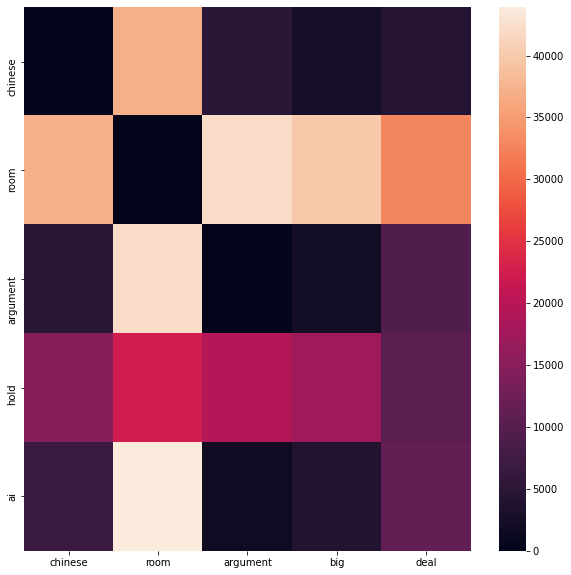



Heatmap between input title and predicted title 2 



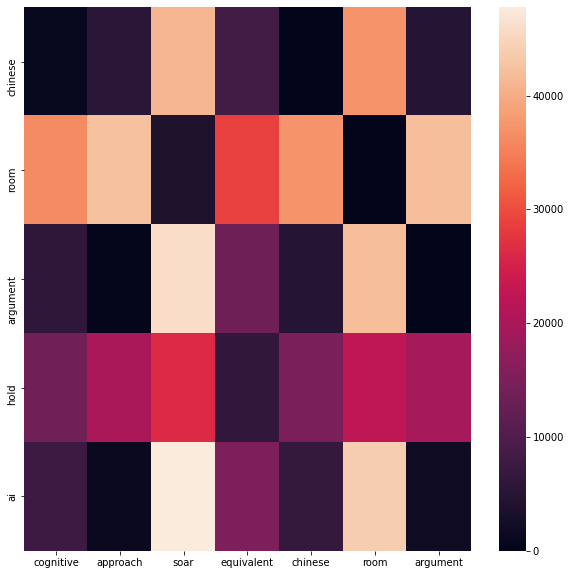



Heatmap between input title and predicted title 3 



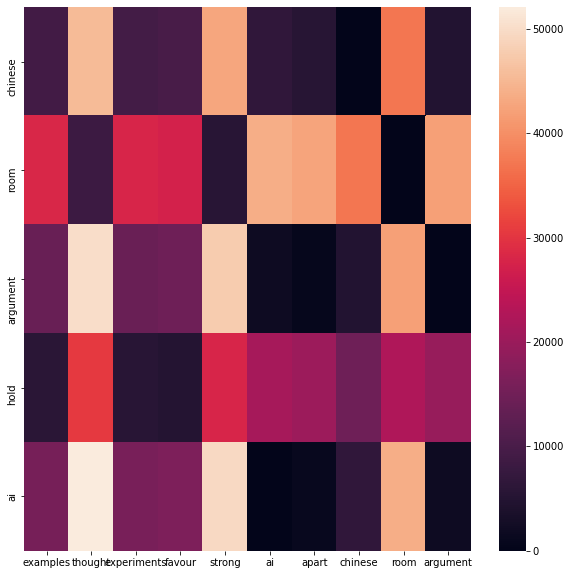



Heatmap between input title and predicted title 4 



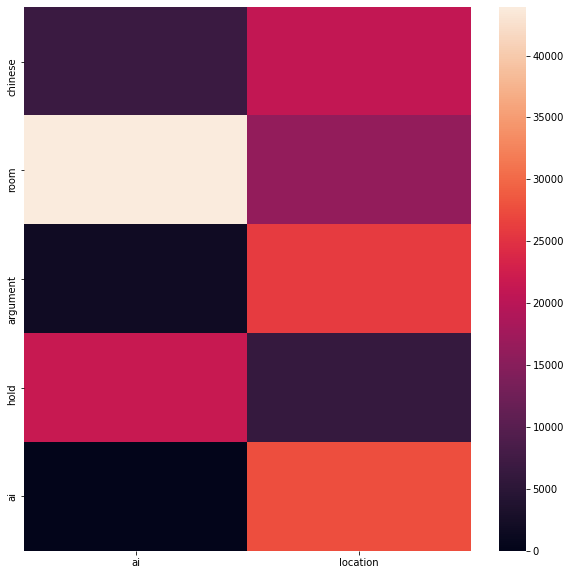



Heatmap between input title and predicted title 5 



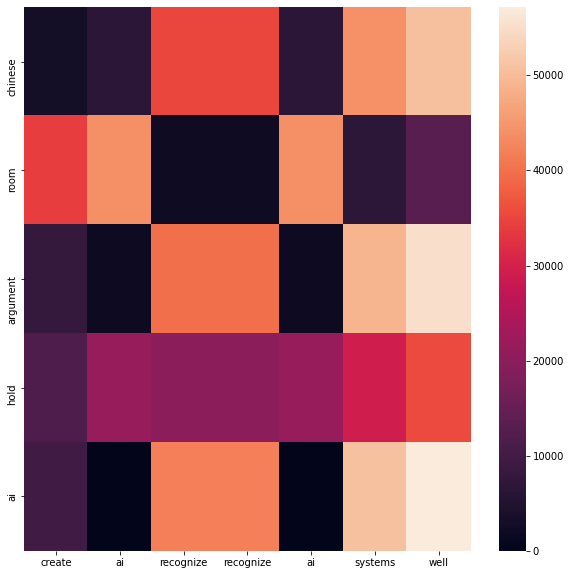

In [ ]:
#For TF-IDF id search
StackOverflow_Search_Engine_Evaluate(op, text_embedding.value)



Heatmap between input title and predicted title 1 



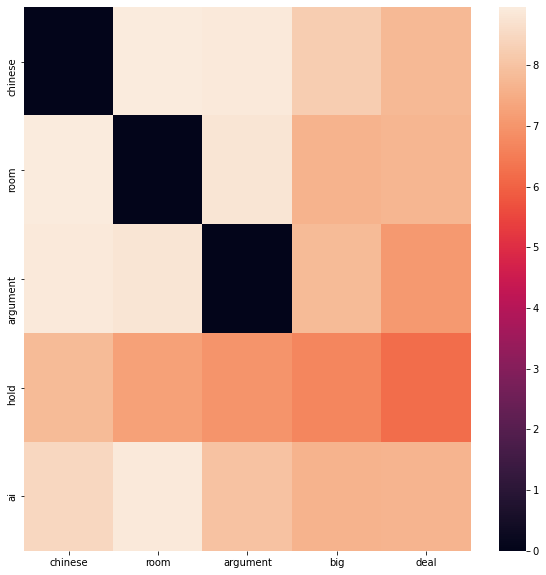



Heatmap between input title and predicted title 2 



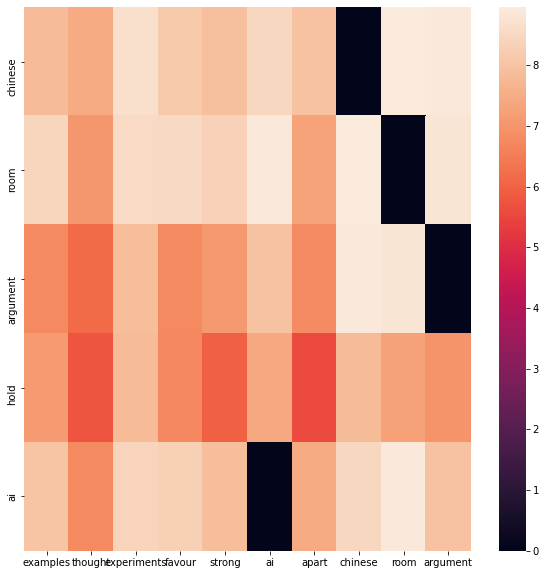



Heatmap between input title and predicted title 3 



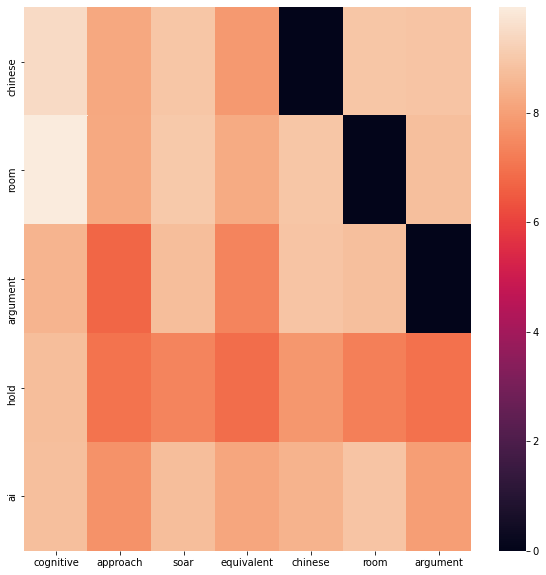



Heatmap between input title and predicted title 4 



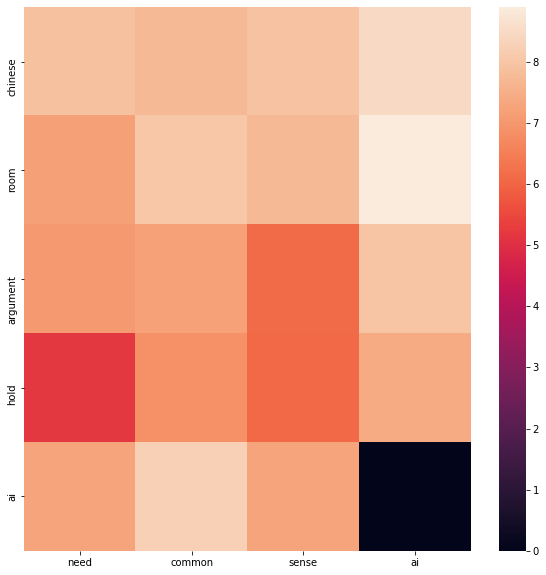



Heatmap between input title and predicted title 5 



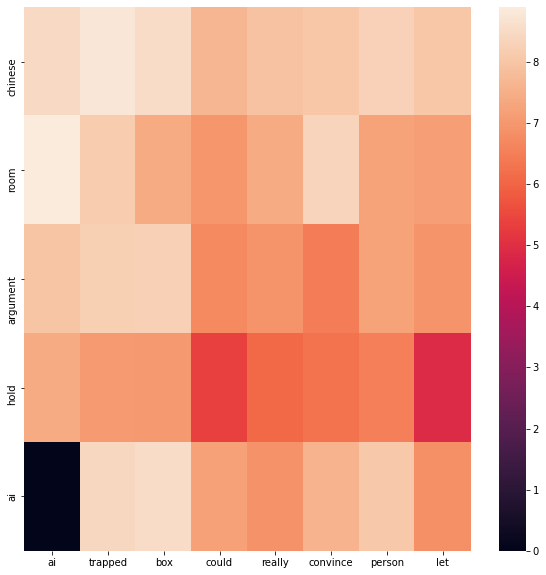

In [ ]:
#For TF-IDF Word2Vec id search
StackOverflow_Search_Engine_Evaluate(op, text_embedding.value)



Heatmap between input title and predicted title 1 



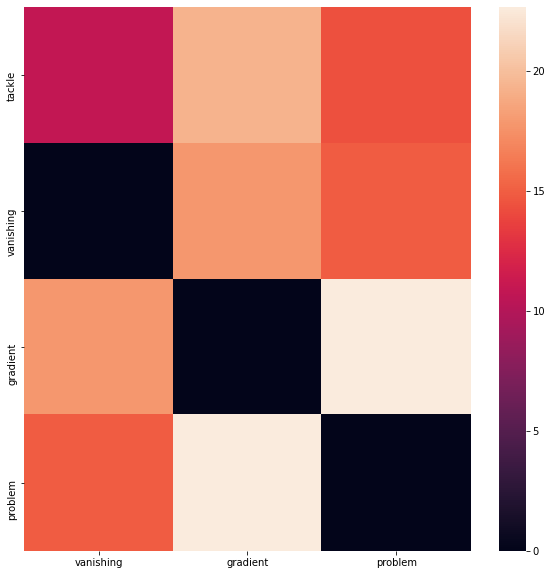



Heatmap between input title and predicted title 2 



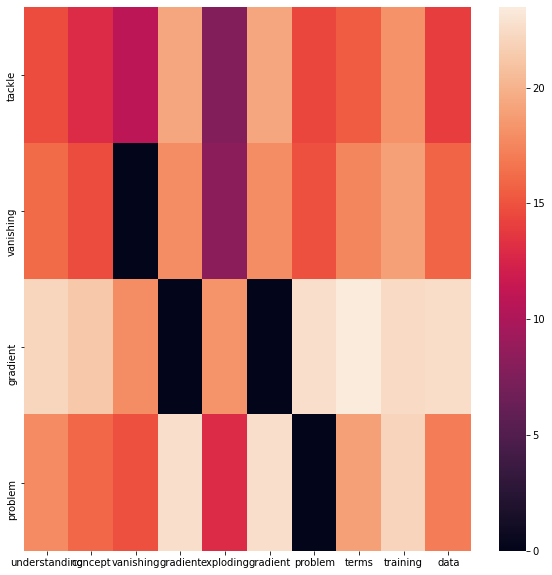



Heatmap between input title and predicted title 3 



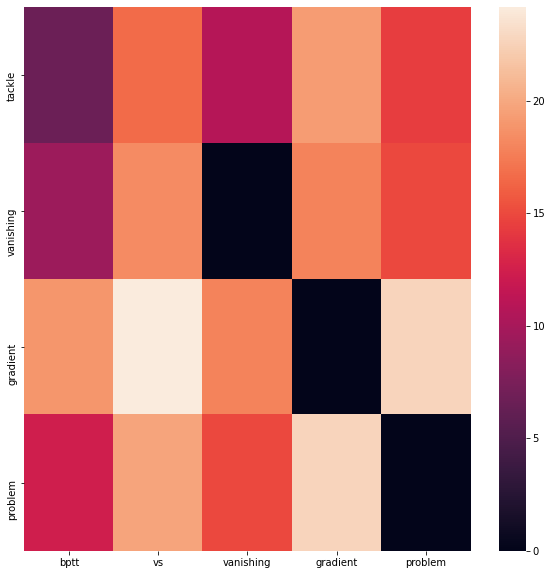



Heatmap between input title and predicted title 4 



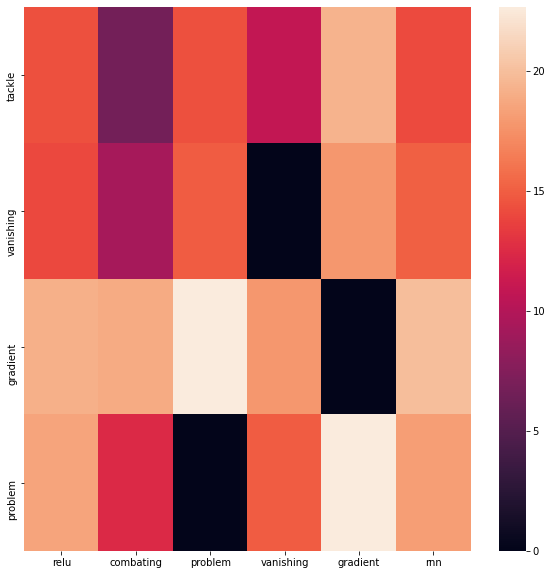



Heatmap between input title and predicted title 5 



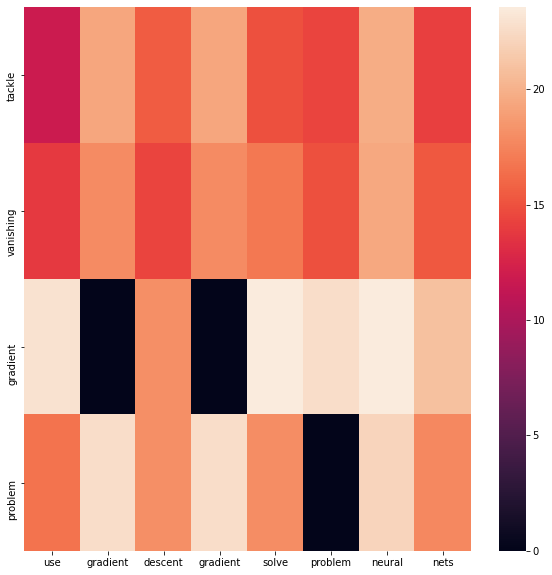

In [ ]:
#For Word2Vec text search
StackOverflow_Search_Engine_Evaluate(op, text_embedding.value)

# 10. Conclusion

* Predictions based on TF-IDF text embedding works very well and fast.
* Prediction using Both TF-IDF Weighted Word2Vec using glove vector and Word2Vec using keyword extraction works nearly same but as we know Stackoerflow is very technical and uses a very specific vocabulary of words, Word2Vec using keyword extraction is a good choice to use here.
* However, pre-trained WordEmbedding like glove_vectors has lots of good words but they are trained on plain English text and would not be able to understand the relation between the specific techincal words in vocabulary.
* Prediction using distilBERT embedding is quite good because distilBERT allows the language model to learn word context based on surrounding words rather than just the word that immediately precedes or follows it.
* But for search engine distilBERT takes more time to predict as compared to other embedding techniques.
* Because distilBERT take more time to convert user raw text to vector as compared to other embedding techniques.
* For recommending question given query post it takes less time but for recommending question given raw text as input it takes much more time.
* Since for search engines, low latency is one of the most important constraint.
* Ideally, using this heavy model in search engine is not so good but predicted results using this model is quite good.
* Prediction using universal sentence encoding is quite good because it not only gives accurate prediction but also in very less time unlike BERT embedding.